# CS412 HW1 BATUHAN GÜZELYURT 31003

## 1-Dataset and Preprocessing

### Load the MNIST Dataset

In [41]:
from sklearn.model_selection import train_test_split

# Load the full training dataset
(x_train_full, y_train_full), (x_test, y_test) = mnist.load_data()

# Split into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train_full, y_train_full, test_size=0.2, random_state=42)

# Print new shapes
print(f"Training set shape: {x_train.shape}, Validation set shape: {x_val.shape}, Test set shape: {x_test.shape}")


Training set shape: (48000, 28, 28), Validation set shape: (12000, 28, 28), Test set shape: (10000, 28, 28)


### Split into Training, Validation and Test Sets 

In [42]:
from sklearn.model_selection import train_test_split

# Split training data into 80% training and 20% validation
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

# Print the shapes
print(f"New training shape: {x_train.shape}, Validation shape: {x_val.shape}, Test shape: {x_test.shape}")


New training shape: (38400, 28, 28), Validation shape: (9600, 28, 28), Test shape: (10000, 28, 28)


### Class Distribution Analysis

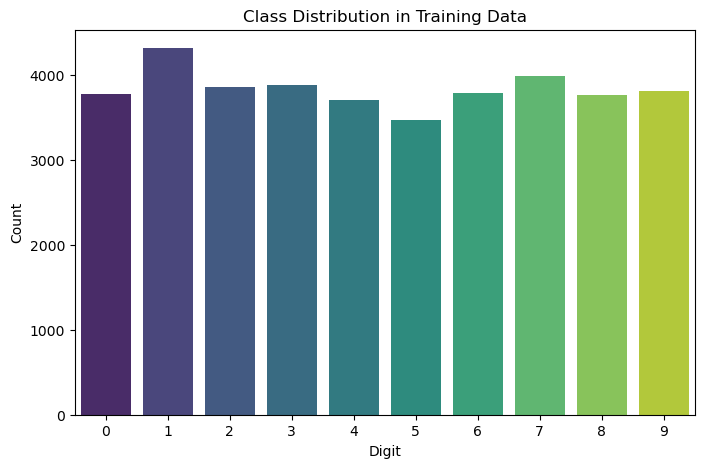

In [43]:
import numpy as np
import seaborn as sns

# Count occurrences of each digit in the training set
unique, counts = np.unique(y_train, return_counts=True)

# Plot the distribution
plt.figure(figsize=(8, 5))
sns.barplot(x=unique, y=counts, palette="viridis")
plt.xlabel("Digit")
plt.ylabel("Count")
plt.title("Class Distribution in Training Data")
plt.show()


### Basic Statistics

In [44]:
print(f"Mean pixel value: {x_train.mean():.4f}")
print(f"Standard deviation of pixel values: {x_train.std():.4f}")


Mean pixel value: 33.3339
Standard deviation of pixel values: 78.5902


### Normalize the Data

In [45]:
# Normalize pixel values to the range [0, 1]
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0


### Visualize the Data

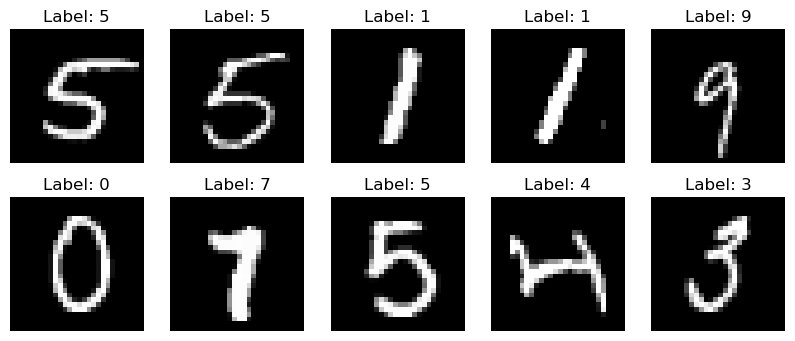

In [46]:
# Plot 10 sample images from the training dataset
plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.show()


## 2-k-NN Classifier

### Import the Necessary Modules

In [47]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import seaborn as sns


### Train and Tune k-NN

In [48]:
# Define the values of k to test
k_values = [1, 3, 5, 7, 9]
val_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train.reshape(len(x_train), -1), y_train)  # Flatten images
    
    # Predict on validation set
    y_val_pred = knn.predict(x_val.reshape(len(x_val), -1))
    
    # Calculate accuracy
    accuracy = accuracy_score(y_val, y_val_pred)
    val_accuracies.append(accuracy)
    print(f"k={k}, Validation Accuracy: {accuracy:.4f}")


k=1, Validation Accuracy: 0.9707
k=3, Validation Accuracy: 0.9686
k=5, Validation Accuracy: 0.9701
k=7, Validation Accuracy: 0.9690
k=9, Validation Accuracy: 0.9674


### Plot Validation Accuracy vs. k

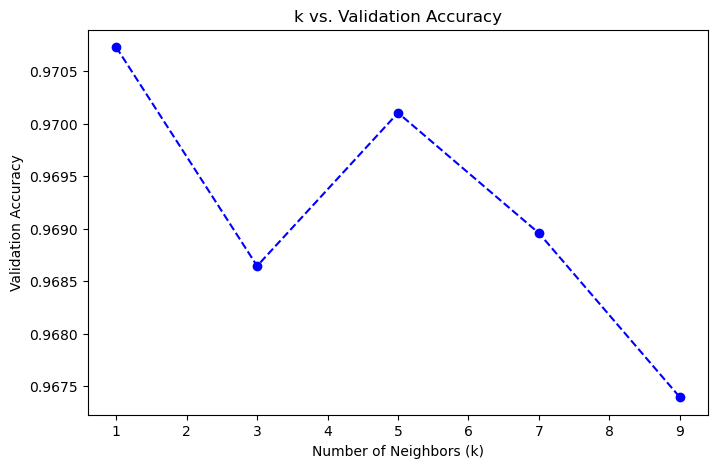

In [49]:
plt.figure(figsize=(8, 5))
plt.plot(k_values, val_accuracies, marker='o', linestyle='--', color='b')
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Validation Accuracy")
plt.title("k vs. Validation Accuracy")
plt.show()


### Train Final Model with Best k

In [50]:
best_k = k_values[val_accuracies.index(max(val_accuracies))]
print(f"Best k: {best_k}")


Best k: 1


In [51]:
# Combine training and validation sets
x_final_train = np.concatenate([x_train, x_val])
y_final_train = np.concatenate([y_train, y_val])

# Train final k-NN model
knn_final = KNeighborsClassifier(n_neighbors=best_k)
knn_final.fit(x_final_train.reshape(len(x_final_train), -1), y_final_train)


KNeighborsClassifier(n_neighbors=1)

### Evaluate on Test Set

In [52]:
# Predict on the test set
y_test_pred = knn_final.predict(x_test.reshape(len(x_test), -1))

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.9673
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.96      0.99      0.98      1135
           2       0.99      0.96      0.97      1032
           3       0.96      0.96      0.96      1010
           4       0.97      0.96      0.96       982
           5       0.95      0.97      0.96       892
           6       0.98      0.98      0.98       958
           7       0.96      0.97      0.96      1028
           8       0.98      0.94      0.96       974
           9       0.95      0.95      0.95      1009

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



### Confusion Matrix & Misclassifications

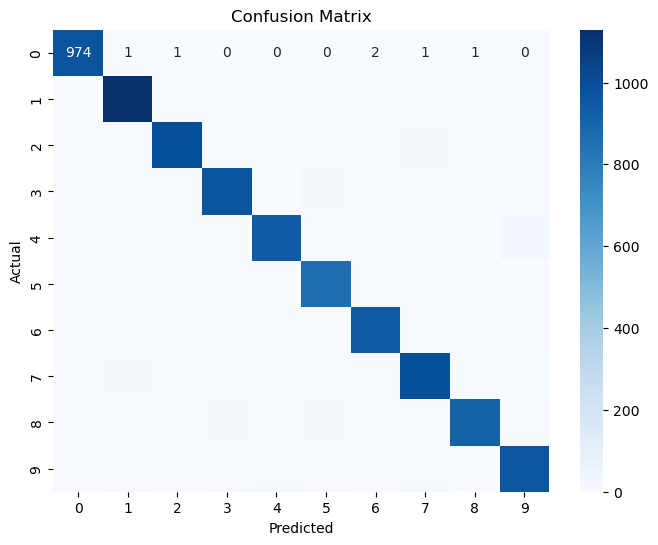

In [53]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


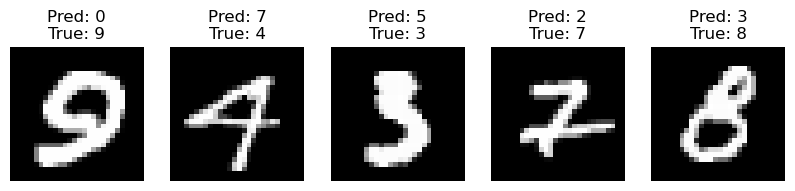

In [54]:
misclassified_idx = np.where(y_test != y_test_pred)[0]
plt.figure(figsize=(10, 4))

for i, idx in enumerate(np.random.choice(misclassified_idx, 5, replace=False)):
    plt.subplot(1, 5, i + 1)
    plt.imshow(x_test[idx], cmap='gray')
    plt.title(f"Pred: {y_test_pred[idx]}\nTrue: {y_test[idx]}")
    plt.axis("off")

plt.show()


## 3-Decision Tree Classifier

### Import Required Libraries

In [55]:
from sklearn.tree import DecisionTreeClassifier


### Train and Tune Decision Tree

In [56]:
# Define hyperparameter values
depth_values = [2, 5, 10]
split_values = [2, 5]
results = {}

# Train models with different hyperparameters
for depth in depth_values:
    for split in split_values:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_split=split, random_state=42)
        dt.fit(x_train.reshape(len(x_train), -1), y_train)

        # Predict on validation set
        y_val_pred = dt.predict(x_val.reshape(len(x_val), -1))

        # Compute accuracy
        accuracy = accuracy_score(y_val, y_val_pred)
        results[(depth, split)] = accuracy
        print(f"max_depth={depth}, min_samples_split={split}, Validation Accuracy: {accuracy:.4f}")


max_depth=2, min_samples_split=2, Validation Accuracy: 0.3398
max_depth=2, min_samples_split=5, Validation Accuracy: 0.3398
max_depth=5, min_samples_split=2, Validation Accuracy: 0.6865
max_depth=5, min_samples_split=5, Validation Accuracy: 0.6865
max_depth=10, min_samples_split=2, Validation Accuracy: 0.8510
max_depth=10, min_samples_split=5, Validation Accuracy: 0.8527


### Choose the Best Model

In [57]:
best_params = max(results, key=results.get)
best_depth, best_split = best_params
print(f"Best max_depth: {best_depth}, Best min_samples_split: {best_split}")


Best max_depth: 10, Best min_samples_split: 5


### Train Final Model on Combined Data

In [58]:
# Combine training and validation sets
x_final_train = np.concatenate([x_train, x_val])
y_final_train = np.concatenate([y_train, y_val])

# Train the final Decision Tree
dt_final = DecisionTreeClassifier(max_depth=best_depth, min_samples_split=best_split, random_state=42)
dt_final.fit(x_final_train.reshape(len(x_final_train), -1), y_final_train)


DecisionTreeClassifier(max_depth=10, min_samples_split=5, random_state=42)

### Evaluate on Test Set

In [59]:
# Predict on test set
y_test_pred = dt_final.predict(x_test.reshape(len(x_test), -1))

# Compute accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test Accuracy: {test_accuracy:.4f}")

# Display classification report
print("Classification Report:\n", classification_report(y_test, y_test_pred))


Test Accuracy: 0.8646
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       980
           1       0.94      0.97      0.95      1135
           2       0.85      0.86      0.85      1032
           3       0.84      0.84      0.84      1010
           4       0.85      0.82      0.83       982
           5       0.84      0.81      0.82       892
           6       0.89      0.87      0.88       958
           7       0.90      0.89      0.90      1028
           8       0.83      0.78      0.80       974
           9       0.80      0.84      0.82      1009

    accuracy                           0.86     10000
   macro avg       0.86      0.86      0.86     10000
weighted avg       0.86      0.86      0.86     10000



### Confusion Matrix & Analysis

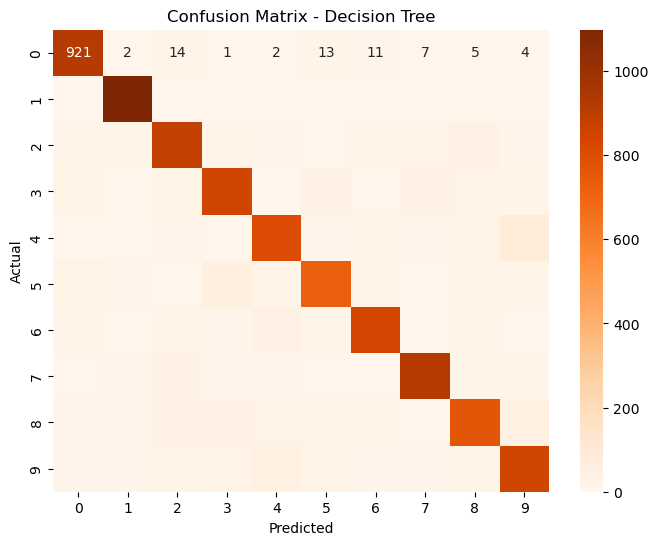

In [60]:
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Oranges", xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Decision Tree")
plt.show()


### Plot ROC Curve

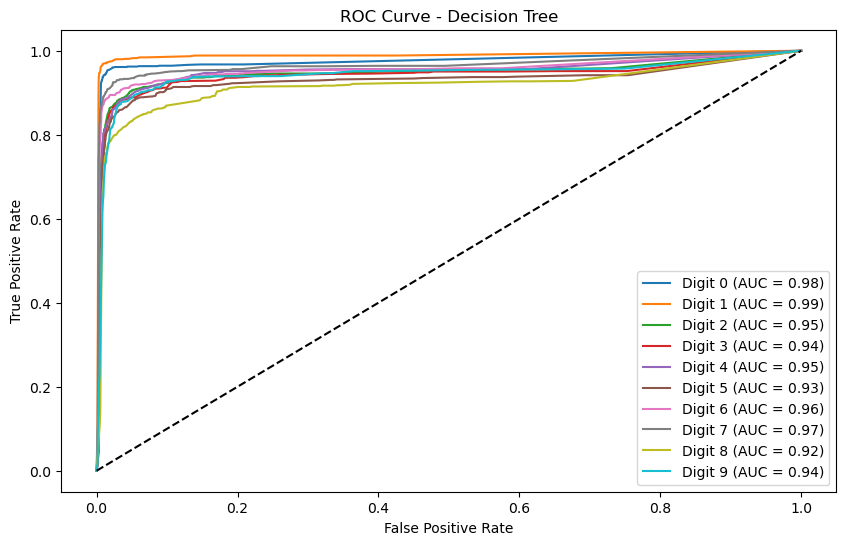

In [61]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize

# Binarize labels
y_test_binarized = label_binarize(y_test, classes=range(10))
y_test_pred_proba = dt_final.predict_proba(x_test.reshape(len(x_test), -1))

# Plot ROC curves
plt.figure(figsize=(10, 6))

for i in range(10):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_test_pred_proba[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f"Digit {i} (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Decision Tree")
plt.legend()
plt.show()
